In [1]:
from stop_words import get_stop_words
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os


Bad key "text.kerning_factor" on line 4 in
D:\Programy\Anaconda\envs\studia\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Set PWD for jupyter
os.chdir("D:/Projects/WD/WD1/wordcloud")

In [3]:
def get_sentence(data):
    words_sentence = " "
    for title in data["title"]:
        tokens = str(title).split()

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
            words_sentence = words_sentence + tokens[i] + " "
    
    return words_sentence
    

In [4]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [5]:
im = Image.open("student.png")
size = 1080, 1080
im = im.resize(size, Image.ANTIALIAS)
student_mask = np.array(im)
transformed_student_mask = np.ndarray((student_mask.shape[0],student_mask.shape[1]), np.int32)

for i in range(len(student_mask)):
    transformed_student_mask[i] = list(map(transform_format, student_mask[i]))

In [49]:
data = pd.read_csv("../data/preludium_with_additional_info_cleared.csv", encoding="UTF-8")
keywords_data = pd.read_csv("../data/preludium_key_words.csv", encoding="UTF-8")
keywords_data = keywords_data.merge(data, left_on = 'Id', right_on = 'id')

polish_from_txt = pd.read_csv("./polish.stopwords.txt", sep=" ", header=None)
polish_from_txt = [x for x in polish_from_txt[0]]
polish_stopwords = get_stop_words("polish") + polish_from_txt
english_stopwords = get_stop_words("english")
wc_stopwords = list(STOPWORDS)

custom_stopwords = ['studia', 'badanie', 'badania', 'badań', 'analiza', 'analizy', 'rola', 'roli', 'role', 'znaczenie', 'znaczenia',
                    'wpływ', 'wpływu', 'związek', 'wplywu', 'wykorzystanie', 'wykorzystaniem', 'pomiędzy', 'poszukiwanie', 'charakterystyka', 'udział', 'identyfikacja', 'identyfikacji', 'identyfikacja', 'wybranych',                     'nowych', 'wybrane', 'nowe', 'nowy', 'ocena', 'oceny', 'metody', 'metod', 'problemów', 'problem', 'problemy', 'algorytmów', 'rozwój', 'opracowanie', 'pacjentów', 'zastosowanie', 'zastosowaniem',
                    'określenie', 'przebiegu', 'zmian', 'chorych', 'typu', 'nowa', 'zmiany', 'metoda', 'algorytmy', 'algorytm', 'dane', 'danych', 'modeli', 'sieciach', 'systemów', 'systemach', 'system', 'procesów',
                    'programowanie', 'programowania', 'komputerowo', 'automatyczne', 'automatycznie', 'automatycznego', 'automatycznej', 'grafu', 'grafach', 'równoległych', 'związków', 'informacji', 'implementacja',                     'zapytań', 'ekstremalnej', 'wokół', 'własności', 'uwzględniające', 'określone', 'spełniające', 'doboru', 'kątem', 'opartych']

stopwords = polish_stopwords + english_stopwords + wc_stopwords + custom_stopwords


In [36]:
words_sentence = get_sentence(data)

nz5_data = data[data.subpanel == "NZ5"]
nz5_sentence = get_sentence(nz5_data)

st6_data = data[data.subpanel == "ST6"]
st6_sentence = get_sentence(st6_data)

st6_1_data = data[(data.subpanel == "ST6") & (data.edition <= 3)]
st6_1_sentence = get_sentence(st6_1_data)

st6_2_data = data[(data.subpanel == "ST6") & (data.edition >= 14)]
st6_2_sentence = get_sentence(st6_2_data)

intersected_data = list(set(nz5_sentence.split()) & set(st6_sentence.split())) 
intersected_sentence = ' '.join(map(str, intersected_data)) 

In [46]:
nz5_keywords_data = keywords_data[keywords_data.subpanel == "NZ5"]
nz5_k_sentence = get_sentence(nz5_keywords_data)

st6_keywords_data = keywords_data[keywords_data.subpanel == "ST6"]
st6_k_sentence = get_sentence(st6_keywords_data)

st6_1_keywords_data = keywords_data[(keywords_data.subpanel == "ST6") & (keywords_data.edition <= 3)]
st6_1_k_sentence = get_sentence(st6_1_keywords_data)

st6_2_keywords_data = keywords_data[(keywords_data.subpanel == "ST6") & (keywords_data.edition >= 14)]
st6_2_k_sentence = get_sentence(st6_2_keywords_data)

In [8]:
def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
    h = 349
    s = 76
    l = int(100.0 * float(random_state.randint(60, 140)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [25]:
def create_wordclouds(words_sentence):
    wordcloud_student = WordCloud(width = 1080, height = 1080, 
                    background_color ='rgba(255,255,255,0)',
                    mode = "RGBA", 
                    color_func=random_color_func,
                    stopwords = stopwords, 
                    mask=transformed_student_mask,
                    contour_width=0,
                    contour_color='black').generate(words_sentence) 

    wordcloud = WordCloud(width = 1920, height = 1080, 
                    background_color ='rgba(255,255,255,0)',
                    mode = "RGBA", 
                    color_func=random_color_func,
                    stopwords = stopwords).generate(words_sentence) 
    
    return wordcloud, wordcloud_student

In [10]:
def save_wordclouds(wordclouds, filename):
    wordcloud, wordcloud_student = wordclouds
    plt.imshow(wordcloud, interpolation='none', aspect='auto')
    plt.axis("off") 
    wordcloud.to_file(f'{filename}.png')
    plt.savefig(f'{filename}.svg')

    plt.imshow(wordcloud_student, interpolation='none', aspect='auto')
    plt.axis("off") 
    wordcloud_student.to_file(f'{filename}_student.png')
    plt.savefig(f'{filename}_student.svg')

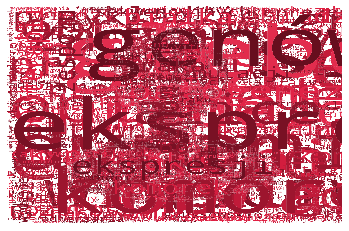

In [51]:
save_wordclouds(create_wordclouds(words_sentence), "wordcloud")
save_wordclouds(create_wordclouds(st6_sentence), "st6_wordcloud")
save_wordclouds(create_wordclouds(st6_1_sentence), "st6_1_wordcloud")
save_wordclouds(create_wordclouds(st6_2_sentence), "st6_2_wordcloud")
save_wordclouds(create_wordclouds(nz5_sentence), "nz5_wordcloud")


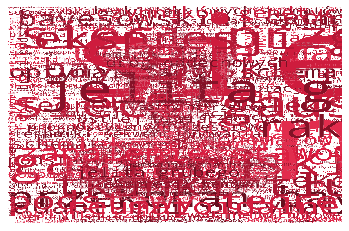

In [50]:
save_wordclouds(create_wordclouds(st6_k_sentence), "st6_keyword_wordcloud")
save_wordclouds(create_wordclouds(st6_1_k_sentence), "st6_1_keyword_wordcloud")
save_wordclouds(create_wordclouds(st6_2_k_sentence), "st6_2_keyword_wordcloud")
save_wordclouds(create_wordclouds(nz5_k_sentence), "nz5__keyword_wordcloud")
